In [ ]:
hi

NameError: name 'hi' is not defined

In [2]:
import multiprocessing

In [3]:
print(multiprocessing.cpu_count())

2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
pip install yfinance

# Gaussian Process

In [6]:
import yfinance as yf

# Uploading the data


In [7]:
djia_symbols = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META",
    "BRK-B", "JPM", "JNJ", "NVDA", "TSLA",
    "V", "PG", "PYPL", "MA", "UNH",
    "DIS", "BAC", "HD", "VZ", "CMCSA",
    "NFLX", "ADBE", "CRM", "XOM", "CSCO",
    "INTC", "ABT", "PEP", "MRK", "T"
]

# Uploading the data for each stock
djia_data = yf.download(djia_symbols, start="2000-01-01", end="2008-01-01", progress=False)

ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['META', 'PYPL', 'TSLA', 'V']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1199163600")


In [8]:
# We restrict ourselves to the price of the stocks at each end of the business day
df=djia_data['Close']

In [9]:
# Removing stocks that contains Nans
for x in df.columns:
  if df[x].isna().sum()>0:
    df=df.drop([x],axis=1)

In [10]:
df

Ticker,AAPL,ABT,ADBE,AMZN,BAC,BRK-B,CMCSA,CSCO,DIS,HD,...,JPM,MRK,MSFT,NVDA,PEP,PG,T,UNH,VZ,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.999442,15.711531,16.390625,4.468750,24.218750,35.299999,15.583333,54.031250,29.471687,65.187500,...,48.583332,64.527672,58.281250,0.975260,36.875000,53.593750,35.498489,6.718750,53.903156,39.156250
2000-01-04,0.915179,15.262630,15.015625,4.096875,22.781250,34.080002,14.416667,51.000000,31.198063,61.750000,...,47.250000,62.261452,56.312500,0.949219,35.937500,52.562500,33.421452,6.632813,52.160721,38.406250
2000-01-05,0.928571,15.234574,15.312500,3.487500,23.031250,34.639999,14.041667,50.843750,32.492844,63.000000,...,46.958332,64.706581,56.906250,0.917969,35.062500,51.562500,33.940708,6.617188,53.903156,40.500000
2000-01-06,0.848214,15.767643,15.437500,3.278125,25.000000,36.080002,14.583333,50.000000,31.198063,60.000000,...,47.625000,65.243324,55.000000,0.858073,36.625000,53.937500,33.043808,6.859375,53.284874,42.593750
2000-01-07,0.888393,15.935981,16.187500,3.478125,24.343750,36.400002,14.125000,52.937500,30.704813,63.500000,...,48.500000,71.505249,55.718750,0.872396,37.625000,58.250000,33.327038,7.664063,52.891418,42.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-24,7.100000,27.996330,42.840000,4.550500,42.279999,90.800003,9.150000,28.719999,33.240002,27.010000,...,44.830002,57.003819,36.580002,8.945000,77.709999,73.940002,31.344412,58.880001,41.813553,93.660004
2007-12-26,7.105357,27.770824,43.119999,4.642500,42.299999,91.400002,9.265000,28.379999,32.820000,26.990000,...,44.939999,56.698475,36.610001,9.065000,77.279999,74.040001,31.948641,58.950001,42.102951,94.809998
2007-12-27,7.091786,27.339005,42.340000,4.712500,41.459999,91.459999,9.215000,27.790001,32.430000,26.770000,...,43.639999,55.887405,35.970001,8.785000,76.699997,73.889999,31.737160,58.360001,41.430798,93.669998


In [11]:
df_returns=df.pct_change()[1:]

In [12]:
df_returns

Ticker,AAPL,ABT,ADBE,AMZN,BAC,BRK-B,CMCSA,CSCO,DIS,HD,...,JPM,MRK,MSFT,NVDA,PEP,PG,T,UNH,VZ,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.084310,-0.028571,-0.083889,-0.083217,-0.059355,-0.034561,-0.074866,-0.056102,0.058577,-0.052733,...,-0.027444,-0.035120,-0.033780,-0.026702,-0.025424,-0.019242,-0.058511,-0.012791,-0.032325,-0.019154
2000-01-05,0.014633,-0.001838,0.019771,-0.148741,0.010974,0.016432,-0.026012,-0.003064,0.041502,0.020243,...,-0.006173,0.039272,0.010544,-0.032922,-0.024348,-0.019025,0.015537,-0.002356,0.033405,0.054516
2000-01-06,-0.086538,0.034991,0.008163,-0.060036,0.085482,0.041571,0.038576,-0.016595,-0.039848,-0.047619,...,0.014197,0.008295,-0.033498,-0.065248,0.044563,0.046061,-0.026425,0.036600,-0.011470,0.051698
2000-01-07,0.047369,0.010676,0.048583,0.061010,-0.026250,0.008869,-0.031429,0.058750,-0.015810,0.058333,...,0.018373,0.095978,0.013068,0.016692,0.027304,0.079954,0.008571,0.117312,-0.007384,-0.002935
2000-01-10,-0.017588,-0.007042,0.038610,-0.005391,-0.034660,-0.003846,0.128319,0.037190,0.152610,-0.004921,...,-0.017182,-0.029191,0.007291,0.032836,-0.019934,-0.004828,0.014164,-0.017329,-0.005313,-0.013981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-24,0.025218,0.001545,0.015647,-0.002739,0.008588,0.014525,-0.005975,0.004196,0.009108,0.013128,...,0.016323,0.009975,0.014420,0.017634,0.004654,-0.001890,0.000482,-0.001865,0.010605,0.002462
2007-12-26,0.000755,-0.008055,0.006536,0.020218,0.000473,0.006608,0.012568,-0.011838,-0.012635,-0.000740,...,0.002454,-0.005357,0.000820,0.013415,-0.005533,0.001352,0.019277,0.001189,0.006921,0.012278
2007-12-27,-0.001910,-0.015549,-0.018089,0.015078,-0.019858,0.000656,-0.005397,-0.020789,-0.011883,-0.008151,...,-0.028927,-0.014305,-0.017482,-0.030888,-0.007505,-0.002026,-0.006619,-0.010008,-0.015965,-0.012024


# CLUSTERING

In [13]:
pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.9 MB/s eta 0:00:00


In [14]:
from tslearn.clustering import TimeSeriesKMeans

In [15]:
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=0, n_init=3)

In [16]:
kmeans.fit(df_returns)

Init 1


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    2.5s
[Parallel(n_jobs

0.008 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    1.3s


0.007 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.6s


0.007 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.6s


0.007 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.6s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.7s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 
Init 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s
[Parallel(n_jobs

0.007 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.8s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.4s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.8s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 
Init 3


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s
[Parallel(n_jobs

0.007 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.007 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.6s


0.007 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.6s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.4s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.4s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.7s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.4s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.4s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.8s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


0.006 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    0.5s


TimeSeriesKMeans(max_iter_barycenter=10, metric='dtw', n_init=3, random_state=0,
                 verbose=True)

In [17]:
L_0=[]
L_1=[]
L_2=[]
for i in range(df.shape[1]):
  if kmeans.labels_[i]==0:
    L_0.append(i)
  elif kmeans.labels_[i]==1:
    L_1.append(i)
  else:
    L_2.append(i)

In [18]:
L_2

[3, 4, 7, 8, 10, 14, 18, 19, 20, 21]

In [19]:
L_1

[9, 11, 16]

In [20]:
L_0

[0, 1, 2, 5, 6, 12, 13, 15, 17]

In [21]:
cluster_0=df.iloc[:,L_0]
cluster_1=df.iloc[:,L_1]
cluster_2=df.iloc[:,L_2]

In [22]:
cluster_0

Ticker,AAPL,ABT,ADBE,BRK-B,CMCSA,JPM,MRK,NVDA,PG
Date,,,,,,,,,
2000-01-03,0.999442,15.711531,16.390625,35.299999,15.583333,48.583332,64.527672,0.975260,53.593750
2000-01-04,0.915179,15.262630,15.015625,34.080002,14.416667,47.250000,62.261452,0.949219,52.562500
2000-01-05,0.928571,15.234574,15.312500,34.639999,14.041667,46.958332,64.706581,0.917969,51.562500
2000-01-06,0.848214,15.767643,15.437500,36.080002,14.583333,47.625000,65.243324,0.858073,53.937500
2000-01-07,0.888393,15.935981,16.187500,36.400002,14.125000,48.500000,71.505249,0.872396,58.250000
...,...,...,...,...,...,...,...,...,...
2007-12-24,7.100000,27.996330,42.840000,90.800003,9.150000,44.830002,57.003819,8.945000,73.940002
2007-12-26,7.105357,27.770824,43.119999,91.400002,9.265000,44.939999,56.698475,9.065000,74.040001
2007-12-27,7.091786,27.339005,42.340000,91.459999,9.215000,43.639999,55.887405,8.785000,73.889999


In [23]:
from tslearn.barycenters import dtw_barycenter_averaging
from scipy.stats import kurtosis

In [24]:
clusters=[cluster_0,cluster_1,cluster_2]

In [25]:
def centroid(k):
  frame=clusters[k]
  cluster_data=[]
  for i in range(frame.shape[1]):
    series_i=frame.iloc[:, i].values
    cluster_data.append(series_i)
  centroid = dtw_barycenter_averaging(cluster_data)
  return centroid

In [26]:
centroid_0=centroid(0)
normalized_centroid_0=centroid_0/centroid_0[0]

In [27]:
centroid_1=centroid(1)
normalized_centroid_1=centroid_1/centroid_1[0]

In [28]:
centroid_2=centroid(2)
normalized_centroid_2=centroid_2/centroid_2[0]

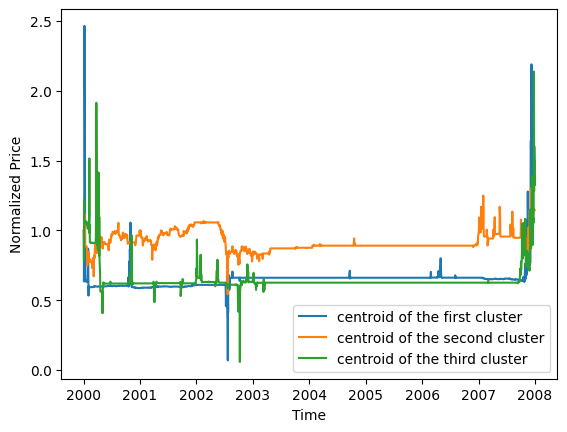

In [29]:
plt.plot(df.index,normalized_centroid_0,label='centroid of the first cluster')
plt.plot(df.index,normalized_centroid_1,label='centroid of the second cluster')
plt.plot(df.index,normalized_centroid_2,label='centroid of the third cluster')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.legend()

In [30]:
centroid_0=pd.Series(centroid_0.reshape(centroid_0.shape[0],))

In [31]:
centroid_1=pd.Series(centroid_1.reshape(centroid_1.shape[0],))

In [32]:
centroid_2=pd.Series(centroid_2.reshape(centroid_2.shape[0],))

In [33]:
normalized_centroid_0=pd.Series(normalized_centroid_0.reshape(normalized_centroid_0.shape[0],))

In [34]:
normalized_centroid_1=pd.Series(normalized_centroid_1.reshape(normalized_centroid_1.shape[0],))

In [35]:
normalized_centroid_2=pd.Series(normalized_centroid_2.reshape(normalized_centroid_2.shape[0],))

In [36]:
normalized_centroid_0.index=df.index
normalized_centroid_1.index=df.index
normalized_centroid_2.index=df.index

# Financial properties

In [ ]:
# Calculer la volatilité et le kurtosis de chaque centroid

In [37]:
returns_0=centroid_0.pct_change()[1:]
returns_1=centroid_1.pct_change()[1:]
returns_2=centroid_2.pct_change()[1:]

In [38]:
print(np.std(returns_0)*100)
print(np.std(returns_1)*100)
print(np.std(returns_2)*100)

16.978637290423713
2.35298619407165
19.19430668035495


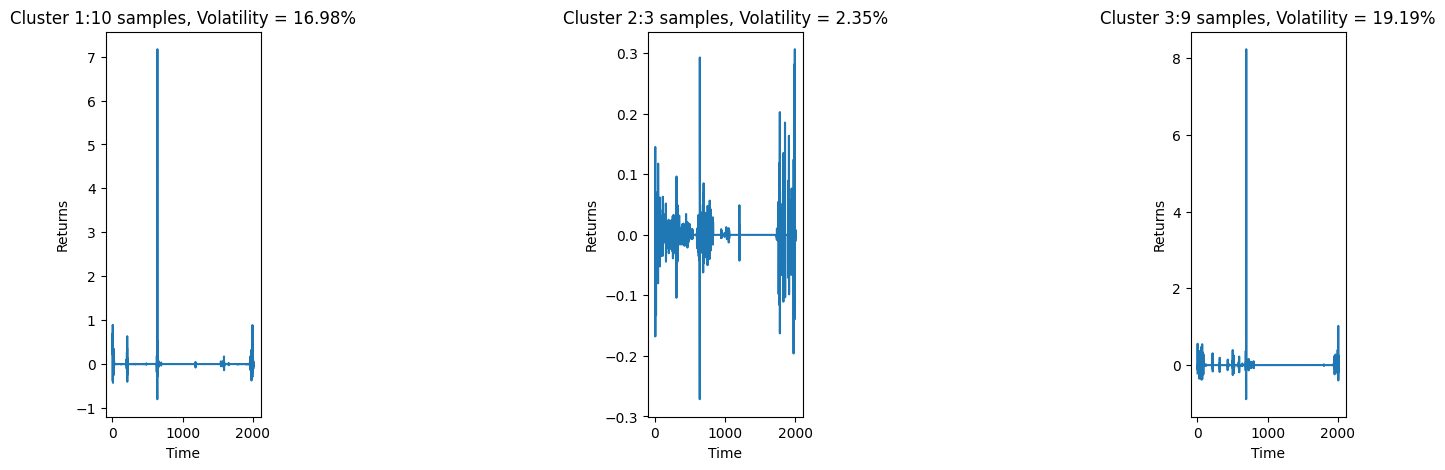

In [62]:
plt.figure(figsize=(16, 5))
plt.subplot(1,3,1)
plt.plot(returns_0)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Cluster 1:10 samples, Volatility = {:.2f}%'.format(np.std(returns_0)*100))
plt.subplot(1,3,2)
plt.plot(returns_1)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Cluster 2:3 samples, Volatility = {:.2f}%'.format(np.std(returns_1)*100))
plt.subplot(1,3,3)
plt.plot(returns_2)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Cluster 3:9 samples, Volatility = {:.2f}%'.format(np.std(returns_2)*100))
plt.subplots_adjust(wspace=2.5)

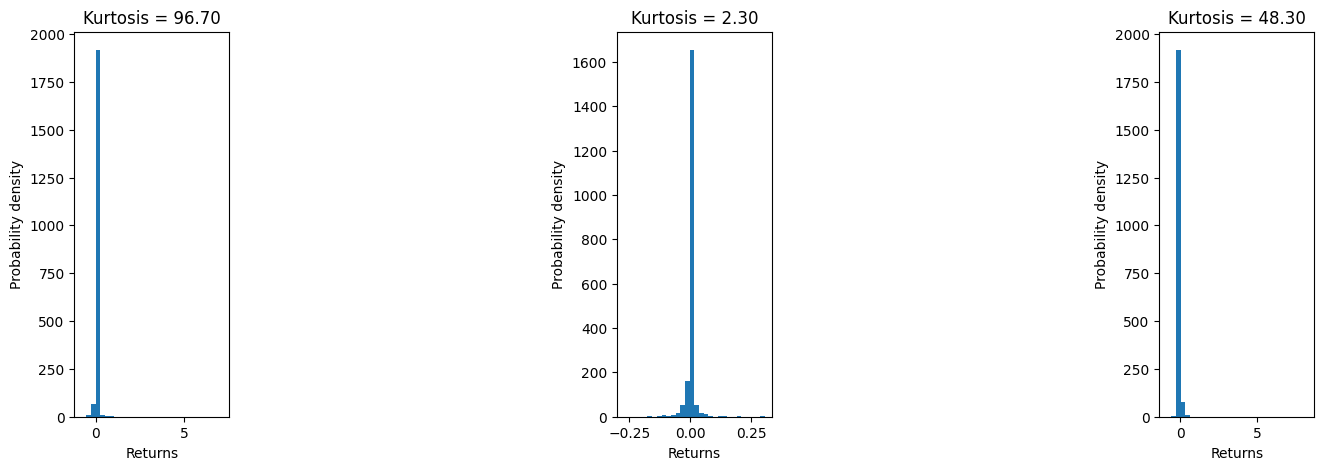

In [73]:
plt.figure(figsize=(16, 5))
plt.subplot(1,3,1)
plt.hist(returns_0,bins=30)
plt.xlabel('Returns')
plt.ylabel('Probability density')
plt.title('Kurtosis = {:.2f}'.format(kurtosis(centroid_0)))
plt.subplot(1,3,2)
plt.hist(returns_1,bins=30)
plt.xlabel('Returns')
plt.ylabel('Probability density')
plt.title('Kurtosis = {:.2f}'.format(kurtosis(centroid_1)))
plt.subplot(1,3,3)
plt.hist(returns_2,bins=30)
plt.xlabel('Returns')
plt.ylabel('Probability density')
plt.title('Kurtosis = {:.2f}'.format(kurtosis(centroid_2)))
plt.subplots_adjust(wspace=2.5)

In [66]:
np.max(returns_1)

0.3068537696520166

In [44]:
kurtosis(centroid_0)

96.69501619211756

(array([1.000e+00, 1.000e+01, 6.800e+01, 1.916e+03, 8.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-8.00058459e-01, -5.34445169e-01, -2.68831880e-01, -3.21858978e-03,
         2.62394700e-01,  5.28007990e-01,  7.93621280e-01,  1.05923457e+00,
         1.32484786e+00,  1.59046115e+00,  1.85607444e+00,  2.12168773e+00,
         2.38730102e+00,  2.65291431e+00,  2.91852760e+00,  3.18414089e+00,
         3.44975418e+00,  3.71536747e+00,  3.98098076e+00,  4.24659405e+00,
         4.51220734e+00,  4.77782063e+00,  5.04343392e+00,  5.30904721e+00,
         5.57466050e+00,  5.84027379e+00,  6.10588708e+00,  6.37150037e+00,
         6.63711366e+00,  6.90272695e+00,  7.16834024e+00]),
 <BarContainer object of 30 artists

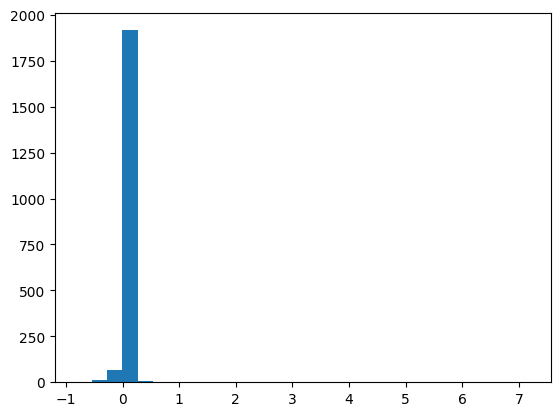

In [43]:
plt.hist(returns_0,bins=30)

# TRAINING

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [ ]:
kernel = 1.0 * RBF(length_scale=1.0)
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)

In [ ]:
train_data.shape

NameError: name 'train_data' is not defined

In [ ]:
gp_model.fit(np.arange(1,train_data.shape[0]+1).reshape(-1,1),train_data.values.reshape(-1,1))

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=1)

In [ ]:
predictions=gp_model.predict(np.arange(1,test_data.shape[0]+1).reshape(-1,1), return_std=True)

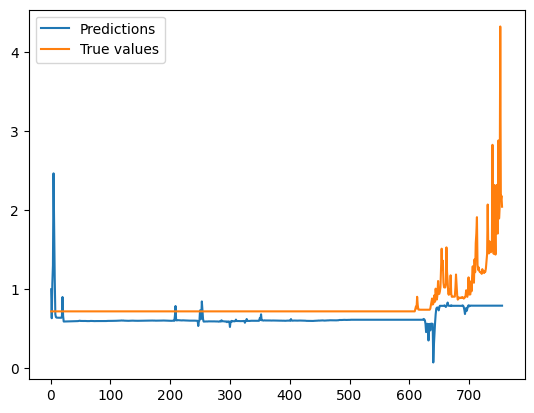

In [ ]:
plt.plot(np.arange(1,test_data.shape[0]+1),predictions[0],label='Predictions')
plt.plot(np.arange(1,test_data.shape[0]+1),test_data,label='True values')
plt.legend()

In [ ]:
centroid_2

0        27.962772
1        17.734877
2        30.009584
3        36.403188
4        68.913306
           ...    
3768     57.137819
3769    120.800702
3770     59.407193
3771     60.992720
3772     57.129206
Length: 3773, dtype: float64

# Dynamic programming

In [ ]:
min(normalized_centroid_0)

0.08981120695629727

In [ ]:
max(normalized_centroid_0)

2.1374128613556898

In [ ]:
print(min(centroid_0))
print(max(centroid_0))

3.0332685643630115
72.1886216780301


In [ ]:
b_2=[0.1]
b_1=[0]
for i in range(1,50):
    b_2.append(b_2[-1]+0.1)
    b_1.append(b_1[-1]+0.1)

In [ ]:
mi=np.min(normalized_centroid_0)
ma=np.max(normalized_centroid_0)
b_2=np.arange(0.8*mi+0.05,1.2*ma+0.05,0.05)
b_1=np.arange(0.8*mi,1.2*ma,0.05)

In [ ]:
b_2

array([0.10588048, 0.15588048, 0.20588048, 0.25588048, 0.30588048,
       0.35588048, 0.40588048, 0.45588048, 0.50588048, 0.55588048,
       0.60588048, 0.65588048, 0.70588048, 0.75588048, 0.80588048,
       0.85588048, 0.90588048, 0.95588048, 1.00588048, 1.05588048,
       1.10588048, 1.15588048, 1.20588048, 1.25588048, 1.30588048,
       1.35588048, 1.40588048, 1.45588048, 1.50588048, 1.55588048,
       1.60588048, 1.65588048, 1.70588048, 1.75588048, 1.80588048,
       1.85588048, 1.90588048, 1.95588048, 2.00588048, 2.05588048,
       2.10588048, 2.15588048, 2.20588048, 2.25588048, 2.30588048,
       2.35588048, 2.40588048, 2.45588048, 2.50588048, 2.55588048,
       2.60588048, 2.65588048, 2.70588048, 2.75588048, 2.80588048,
       2.85588048, 2.90588048, 2.95588048, 3.00588048])

In [ ]:
import scipy.stats as stats
from scipy.integrate import quad

In [ ]:
def normal_pdf(z):
    return stats.norm.pdf(z, loc=0, scale=1)

In [ ]:
quad(normal_pdf, b_1[4], b_2[4])

(0.03604071966368893, 4.0013236794688075e-16)

In [ ]:
def one_step(t):
  sum=0
  for j in range(M):
    sum+=A[t,j]*quad(normal_pdf, b_1[j], b_2[j])[0]
  for i in range(M):
    A[t-1,i]=max((b_1[i]+b_2[i])*0.5,sum)

In [ ]:
for i in range(T-1,0,-1):
  one_step(i)

In [ ]:
A

array([[0.43640194, 0.43640194, 0.43640194, ..., 4.75      , 4.85      ,
        4.95      ],
       [0.43640194, 0.43640194, 0.43640194, ..., 4.75      , 4.85      ,
        4.95      ],
       [0.43640194, 0.43640194, 0.43640194, ..., 4.75      , 4.85      ,
        4.95      ],
       ...,
       [0.43063134, 0.43063134, 0.43063134, ..., 4.75      , 4.85      ,
        4.95      ],
       [0.3992733 , 0.3992733 , 0.3992733 , ..., 4.75      , 4.85      ,
        4.95      ],
       [0.05      , 0.15      , 0.25      , ..., 4.75      , 4.85      ,
        4.95      ]])

In [ ]:
policy=np.zeros((T,M))

NameError: name 'M' is not defined

In [ ]:
for t in range(0,T):
  for i in range(0,M):
    if A[t,i]==(b_1[i]+b_2[i])*0.5:
      policy[t,i]=1
    else:
      policy[t,i]=0

In [ ]:
policy

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import GridSearchCV

In [ ]:
kernel = RBF() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel)
param_grid = {'kernel__k1__length_scale': [1.0, 2.0, 3.0],  # Longueur d'échelle du noyau RBF
              'kernel__k2__noise_level': [0.1, 0.5, 1.0]}  # Niveau de bruit blanc

# Définir la stratégie de validation croisée
cv = 5

# Créer un objet GridSearchCV pour optimiser les hyperparamètres
grid_search = GridSearchCV(model, param_grid, cv=cv,verbose=2)
grid_search.fit(np.arange(1,len(normalized_centroid_0)+1).reshape(-1,1), normalized_centroid_0)
grid_search.best_params_

In [ ]:
kernel = RBF() + WhiteKernel()

In [ ]:
model = GaussianProcessRegressor(kernel=kernel)

In [ ]:
param_grid = {'kernel__k1__length_scale': [1.0, 2.0, 3.0],  # Longueur d'échelle du noyau RBF
              'kernel__k2__noise_level': [0.1, 0.5, 1.0]}  # Niveau de bruit blanc

# Définir la stratégie de validation croisée
cv = 5

# Créer un objet GridSearchCV pour optimiser les hyperparamètres
grid_search = GridSearchCV(model, param_grid, cv=cv,verbose=2)

In [ ]:
grid_search.fit(np.arange(1,len(normalized_centroid_0)+1).reshape(-1,1), normalized_centroid_0)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.1; total time=  52.1s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.1; total time=  52.1s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.1; total time=  59.6s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.1; total time= 1.0min
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.1; total time=  33.4s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.5; total time=  57.0s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.5; total time=  50.5s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.5; total time=  50.1s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.5; total time= 1.0min
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=0.5; total time=  38.8s
[CV] END kernel__k1__length_scale=1.0, kernel__k2__noise_level=1.0; to

GridSearchCV(cv=5,
             estimator=GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1)),
             param_grid={'kernel__k1__length_scale': [1.0, 2.0, 3.0],
                         'kernel__k2__noise_level': [0.1, 0.5, 1.0]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'kernel__k1__length_scale': 1.0, 'kernel__k2__noise_level': 0.5}

In [ ]:
normalized_centroid_0

0       1.000000
1       0.916086
2       1.006474
3       0.969114
4       1.014767
          ...   
3014    0.925360
3015    2.137413
3016    1.048824
3017    1.340327
3018    1.068872
Length: 3019, dtype: float64

In [ ]:
kernel=RBF(length_scale=1.0)

In [ ]:
kernel=RBF(length_scale=1.0)

In [ ]:
kernel([[1]],[[0.5]])

array([[0.8824969]])

In [ ]:
list=normalized_centroid_0.iloc[:t].tolist()

NameError: name 't' is not defined

In [ ]:
np.max(normalized_centroid_0)

2.464466227375527

In [ ]:
T=len(normalized_centroid_0)
K=np.zeros((T,T))
for i in range(T):
  for j in range(T):
    K[i,j]=kernel([[i]],[[j]])

<ipython-input-54-242d69dc2f96>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i,j]=kernel([[i]],[[j]])


KeyboardInterrupt: 

In [ ]:
K

array([[1.        , 0.60653066, 0.13533528, ..., 0.        , 0.        ,
        0.        ],
       [0.60653066, 1.        , 0.60653066, ..., 0.        , 0.        ,
        0.        ],
       [0.13533528, 0.60653066, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.60653066,
        0.13533528],
       [0.        , 0.        , 0.        , ..., 0.60653066, 1.        ,
        0.60653066],
       [0.        , 0.        , 0.        , ..., 0.13533528, 0.60653066,
        1.        ]])

In [ ]:
np.array(normalized_centroid_0[:10])

array([1.        , 0.91608603, 1.00647426, 0.96911428, 1.01476679,
       0.99879548, 0.9790391 , 0.95338703, 0.96691373, 0.98430695])

In [ ]:
new_centroid=normalized_centroid_0[::10]

In [ ]:
def integral(t,i):
  K_t=K[:t,:t]
  y_t=np.array(new_centroid[:t])
  k=[0 for p in range(t)]
  for j in range(t):
    k[j]=kernel([[t]],[[j]])
  k=np.array(k)
  array=k.reshape(t, 1)
  #print(array.shape)
  #print(K_t.shape)
  mean_=array.T@np.linalg.inv(K_t+0.5**2*np.eye((t)))@y_t
  variance_=1-(array.T)@(np.linalg.inv(K_t+(0.5**2)*np.eye((t))))@array
  #print(mean_)
  #print(variance_)
  def normal_pdf(z):
    return stats.norm.pdf(z, loc=mean_, scale=variance_)
  I=quad(normal_pdf,b_1[i],b_2[i])[0]
  return I

In [ ]:
T=len(new_centroid)
M=len(b_2)
A=np.zeros((T,M))

In [ ]:
for i in range(A.shape[1]):
  A[T-1,i]=(b_1[i]+b_2[i])*0.5

In [ ]:
A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08088048, 0.13088048, 0.18088048, ..., 2.88088048, 2.93088048,
        2.98088048]])

In [ ]:
def one_step(t):
  sum=0
  for j in range(M):
    sum+=A[t,j]*integral(t,j)
    print(j)
  for i in range(M):
    A[t-1,i]=max((b_1[i]+b_2[i])*0.5,sum)

In [ ]:
one_step(T-1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [ ]:
for j in range(T-2,0,-1):
  one_step(j)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [ ]:
A

array([[0.656769  , 0.656769  , 0.656769  , ..., 2.88088048, 2.93088048,
        2.98088048],
       [0.57309798, 0.57309798, 0.57309798, ..., 2.88088048, 2.93088048,
        2.98088048],
       [0.6073402 , 0.6073402 , 0.6073402 , ..., 2.88088048, 2.93088048,
        2.98088048],
       ...,
       [0.72094581, 0.72094581, 0.72094581, ..., 2.88088048, 2.93088048,
        2.98088048],
       [0.39631001, 0.39631001, 0.39631001, ..., 2.88088048, 2.93088048,
        2.98088048],
       [0.08088048, 0.13088048, 0.18088048, ..., 2.88088048, 2.93088048,
        2.98088048]])

In [ ]:
policy=np.zeros((T,M))

In [ ]:
for t in range(0,T):
  for i in range(0,M):
    if A[t,i]==(b_1[i]+b_2[i])*0.5:
      policy[t,i]=1
    else:
      policy[t,i]=0

In [ ]:
policy

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
cluster_0

Ticker,AAPL,ABT,ADBE,BRK-B,CMCSA,JPM,MRK,NVDA,PG
Date,,,,,,,,,
2000-01-03,0.999442,15.711531,16.390625,35.299999,15.583333,48.583332,64.527672,0.975260,53.593750
2000-01-04,0.915179,15.262630,15.015625,34.080002,14.416667,47.250000,62.261452,0.949219,52.562500
2000-01-05,0.928571,15.234574,15.312500,34.639999,14.041667,46.958332,64.706581,0.917969,51.562500
2000-01-06,0.848214,15.767643,15.437500,36.080002,14.583333,47.625000,65.243324,0.858073,53.937500
2000-01-07,0.888393,15.935981,16.187500,36.400002,14.125000,48.500000,71.505249,0.872396,58.250000
...,...,...,...,...,...,...,...,...,...
2007-12-24,7.100000,27.996330,42.840000,90.800003,9.150000,44.830002,57.003819,8.945000,73.940002
2007-12-26,7.105357,27.770824,43.119999,91.400002,9.265000,44.939999,56.698475,9.065000,74.040001
2007-12-27,7.091786,27.339005,42.340000,91.459999,9.215000,43.639999,55.887405,8.785000,73.889999


In [ ]:
print(cluster_0)

Ticker          AAPL        ABT       ADBE      BRK-B      CMCSA        JPM  \
Date                                                                          
2000-01-03  0.999442  15.711531  16.390625  35.299999  15.583333  48.583332   
2000-01-04  0.915179  15.262630  15.015625  34.080002  14.416667  47.250000   
2000-01-05  0.928571  15.234574  15.312500  34.639999  14.041667  46.958332   
2000-01-06  0.848214  15.767643  15.437500  36.080002  14.583333  47.625000   
2000-01-07  0.888393  15.935981  16.187500  36.400002  14.125000  48.500000   
...              ...        ...        ...        ...        ...        ...   
2007-12-24  7.100000  27.996330  42.840000  90.800003   9.150000  44.830002   
2007-12-26  7.105357  27.770824  43.119999  91.400002   9.265000  44.939999   
2007-12-27  7.091786  27.339005  42.340000  91.459999   9.215000  43.639999   
2007-12-28  7.136786  27.458954  42.930000  93.699997   9.200000  43.259998   
2007-12-31  7.074286  26.940769  42.730000  94.72000

In [ ]:
y_test=cluster_0['PG']

In [ ]:
y_test=y_test/y_test.iloc[0]

In [ ]:
y=y_test[::10]

In [ ]:
y

Date
2000-01-03    1.000000
2000-01-18    1.090962
2000-02-01    0.928280
2000-02-15    0.893294
2000-03-01    0.823324
                ...   
2007-10-19    1.321050
2007-11-02    1.297726
2007-11-16    1.365644
2007-12-03    1.371802
2007-12-17    1.366577
Name: PG, Length: 201, dtype: float64

In [ ]:
W=len(y)//2 +5

In [ ]:
y_w=y.iloc[:W]

In [ ]:
y_w

Date
2000-01-03    1.000000
2000-01-18    1.090962
2000-02-01    0.928280
2000-02-15    0.893294
2000-03-01    0.823324
                ...   
2003-12-26    0.916525
2004-01-12    0.935277
2004-01-27    0.925294
2004-02-10    0.954869
2004-02-25    0.958041
Name: PG, Length: 105, dtype: float64

In [ ]:
W

105

In [ ]:
for t in range(W,T):
  i=np.floor(y.iloc[t]/0.05).astype(int)
  if policy[t,i]==1:
    print(t)
    break


105


In [ ]:
data=new_centroid
data[:W]=y_w

In [ ]:
kernel = RBF() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel)
param_grid = {'kernel__k1__length_scale': [ 4.1,4.3,3.9,4.0,4.2,3.95,4.05],  # Longueur d'échelle du noyau RBF
              'kernel__k2__noise_level': [0.6,0.7, 0.8]}  # Niveau de bruit blanc

# Définir la stratégie de validation croisée
cv = 5

# Créer un objet GridSearchCV pour optimiser les hyperparamètres
grid_search = GridSearchCV(model, param_grid, cv=cv,verbose=2)
grid_search.fit(np.arange(1,len(data)+1).reshape(-1,1), data)
grid_search.best_params_

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.6; total time=   0.1s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.6; total time=   0.1s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.6; total time=   0.1s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.6; total time=   0.2s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.6; total time=   0.5s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.7; total time=   0.4s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.7; total time=   0.5s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.7; total time=   0.6s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.7; total time=   0.2s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.7; total time=   0.3s
[CV] END kernel__k1__length_scale=4.1, kernel__k2__noise_level=0.8; 

{'kernel__k1__length_scale': 3.95, 'kernel__k2__noise_level': 0.7}

In [ ]:
grid_search.best_params_

{'kernel__k1__length_scale': 3.95, 'kernel__k2__noise_level': 0.7}

In [ ]:
kerneladapt=RBF(length_scale=grid_search.best_params_['kernel__k1__length_scale'])

In [ ]:
def integraladapt(t,i):
  K_t=K[:t,:t]
  y_t=np.array(data[:t])
  k=[0 for p in range(t)]
  for j in range(t):
    k[j]=kerneladapt([[t]],[[j]])
  k=np.array(k)
  array=k.reshape(t, 1)
  #print(array.shape)
  #print(K_t.shape)
  mean_=array.T@np.linalg.inv(K_t+grid_search.best_params_['kernel__k2__noise_level']**2*np.eye((t)))@y_t
  variance_=1-(array.T)@(np.linalg.inv(K_t+(grid_search.best_params_['kernel__k2__noise_level']**2)*np.eye((t))))@array
  #print(mean_)
  #print(variance_)
  def normal_pdf(z):
    return stats.norm.pdf(z, loc=mean_, scale=variance_)
  I=quad(normal_pdf,b_1[i],b_2[i])[0]
  return I

In [ ]:
T=len(data)
M=len(b_2)
A=np.zeros((T-W,M))
for i in range(A.shape[1]):
  A[T-W-1,i]=(b_1[i]+b_2[i])*0.5
def one_step(t):
  sum=0
  for j in range(M):
    sum+=A[t,j]*integraladapt(t,j)
    #print(j)
  for i in range(M):
    A[t-1,i]=max((b_1[i]+b_2[i])*0.5,sum)
for j in range(T-W-1,0,-1):
  one_step(j)
policyadapt=np.zeros((T-W,M))
for t in range(0,T-W):
  for i in range(0,M):
    if A[t,i]==(b_1[i]+b_2[i])*0.5:
      policyadapt[t,i]=1
    if A[t,i]<b_1[0] or A[t,i]>b_2[-1]:
      print(9)
    else:
      policyadapt[t,i]=0
A,policyadapt



<ipython-input-333-02fd12042d0a>:17: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I=quad(normal_pdf,b_1[i],b_2[i])[0]


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


(array([[1.07284514, 1.07284514, 1.07284514, ..., 2.88088048, 2.93088048,
         2.98088048],
        [1.11487719, 1.11487719, 1.11487719, ..., 2.88088048, 2.93088048,
         2.98088048],
        [1.09807063, 1.09807063, 1.09807063, ..., 2.88088048, 2.93088048,
         2.98088048],
        ...,
        [0.08088048, 0.13088048, 0.18088048, ..., 2.88088048, 2.93088048,
         2.98088048],
        [0.08088048, 0.13088048, 0.18088048, ..., 2.88088048, 2.93088048,
         2.98088048],
        [0.08088048, 0.13088048, 0.18088048, ..., 2.88088048, 2.93088048,
         2.98088048]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
np.sum(1-policy)

1607.0

In [ ]:
for t in range(T-W):
  i=np.floor(y.iloc[t]/0.05).astype(int)
  i=max(i,0)
  i=min(i,M-1)
  if policyadapt[t,i]==1:

    print(t)
    break

In [ ]:
yy=y[W:]

ans=0
for t in range(T-W):
  i=np.floor(yy.iloc[t]/0.05).astype(int)
  i=max(i,0)
  i=min(i,M-1)
  ans+=policyadapt[t,i]*yy[t]
ans

0.0

In [ ]:
yy=y

ans=0
for t in range(T):
  i=np.floor(yy.iloc[t]/0.05).astype(int)
  i=max(i,0)
  i=min(i,M-1)
  ans+=policy[t,i]*yy[t]
np.max(yy)-ans

-179.09019252232144

In [ ]:
def distance(y,centroid):
  kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=0, n_init=3)

In [ ]:
from tslearn.metrics import dtw


In [ ]:
D=[normalized_centroid_0[::10],normalized_centroid_1[::10],normalized_centroid_2[::10]]

In [ ]:
def findcluster(y,D):
  l=[]
  for k in range(len(D)):
    print(y,D[k])
    distance= dtw(np.array(y), np.array(D[k]))

    l.append(distance)
  return np.argmin(l)